### EDA of 9000 Movies + TV Shows on 'Netflix' over the years (1925-2021)

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Reading the dataset

In [2]:
netflix=pd.read_csv('netflix_titles.csv')

##### Cleaning the Netflix dataset

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Printing information about all the columns

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Printing total no. of null values in each column

In [6]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Dropping unnecessary columns

In [7]:
netflix.drop('show_id',axis=1,inplace=True)

In [8]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Total count of directors

In [9]:
netflix['director'].nunique()

4528

Therefore, we can say that 4528 are unique values out of which 2634 are missing values

In [10]:
netflix.loc[netflix['director'].isna()].tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8795,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


The above table shows a few rows consisting of null values for the attribute, director.

In [11]:
netflix.loc[netflix['country'].isna()].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


The above dataframe shows missing values for the attribute, country.

In [12]:
d=netflix[netflix['country'].notnull()]
d.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


The following dataframe shows the missing values for directors where the country attribute is not null.

In [13]:
bool_series = pd.isnull(d["director"])
d[bool_series].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
15,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
17,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
21,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...


In [14]:
d[bool_series].loc[:,'country'].value_counts()

country
United States                                    770
United Kingdom                                   207
Japan                                            160
South Korea                                      150
India                                             82
                                                ... 
Chile, Italy                                       1
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
United States, France, South Korea, Indonesia      1
Name: count, Length: 188, dtype: int64

The above series shows the country-wise no. of missing values for directors.

In [15]:
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [16]:
print("Total no. of Movies: ", (netflix['type']=='Movie').sum())
print("Total no. of TV Shows: ", (netflix['type']=='TV Show').sum())

Total no. of Movies:  6131
Total no. of TV Shows:  2676


##### Data Visualization

In [17]:
# #suplot  ------>   check the plot modification

# plt.figure(figsize=(5, 5))
# plt.title("Movies & TV Shows on Netflix")
# sns.histplot(
#     x = "type", 
#     data=netflix,
#     hue=netflix['type'])
# plt.ylabel("Total no. Movies/TV Shows")
# plt.show()

Thus, we can say that the total no. of TV shows is less than the total count of Movies.

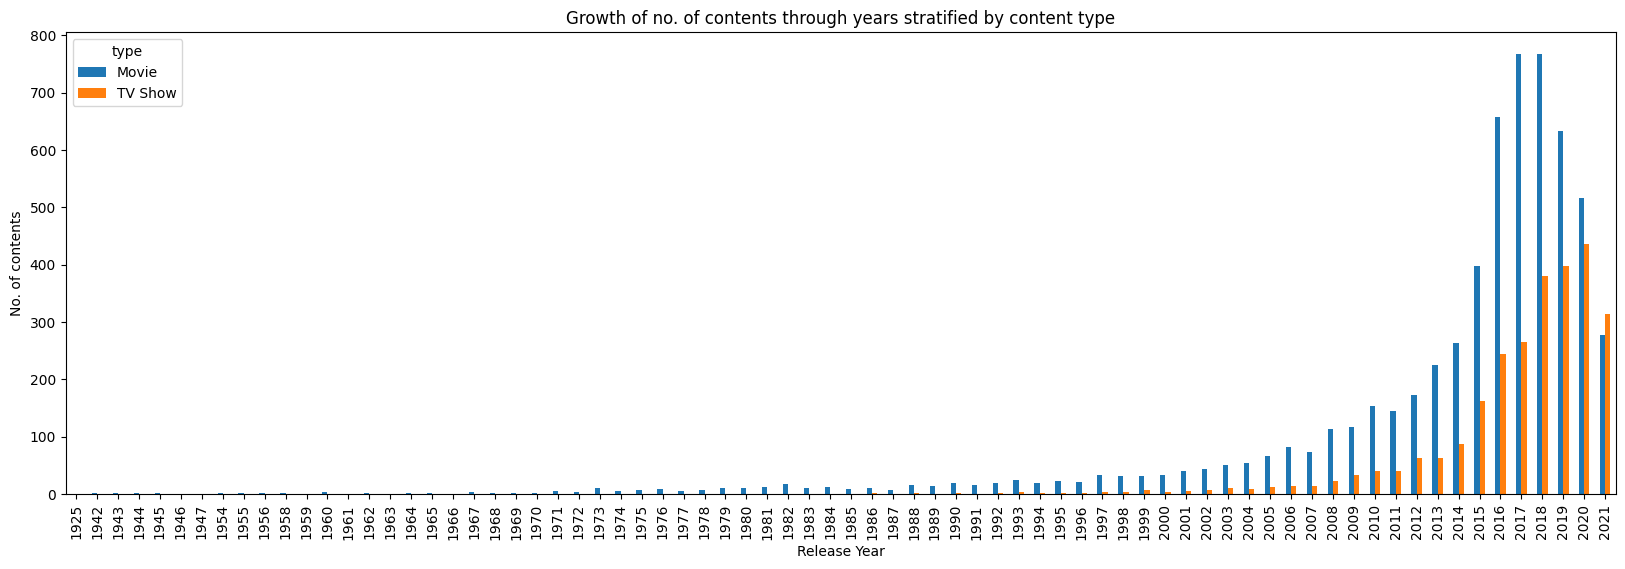

In [18]:
netflix.groupby(['release_year','type']).size().unstack().plot(
    kind='bar', 
    stacked=False, 
    figsize=(20, 6), 
    ylabel="No. of contents",
    xlabel="Release Year"
)
plt.title("Growth of no. of contents through years stratified by content type")
plt.show()

In [19]:
netflix.loc[netflix['date_added'].isna()].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."


The above dataframe shows missing values of date_added.

In [20]:
netflix.loc[netflix['duration'].isna()].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


The above dataframe shows missing values of duration.

The dataframe below shows otherwise.

In [21]:
netflix.loc[netflix['duration'].notnull()].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
netflix.loc[netflix['rating'].isna()].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


The above dataframe shows missing values of rating.

In [23]:
netflix.loc[netflix['cast'].isna()].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...


The above dataframe shows missing values of cast.

In [24]:
netflix

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [25]:
netflix['release_year'].nunique()

74

In [26]:
netflix['release_year'].min()

1925

In [27]:
netflix['release_year'].max()

2021

In [28]:
r=netflix['release_year'].value_counts().nlargest(10)
r

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

In [29]:
fig=px.area(x=r.index, y=r, title = 'Release Years', color_discrete_sequence=['brown'])
fig.show()

Based on the above plot we can say that 2018 had the maximum releases.

In [30]:
netflix['country'].nunique()

748

In [31]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [32]:
netflix['listed_in'].nunique()

514

In [33]:
netflix.loc[netflix['listed_in'].notnull()].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [34]:
# netflix['listed_in'].unique()

In [35]:
a=netflix['listed_in'].value_counts().nlargest(10)
a

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='listed_in'>

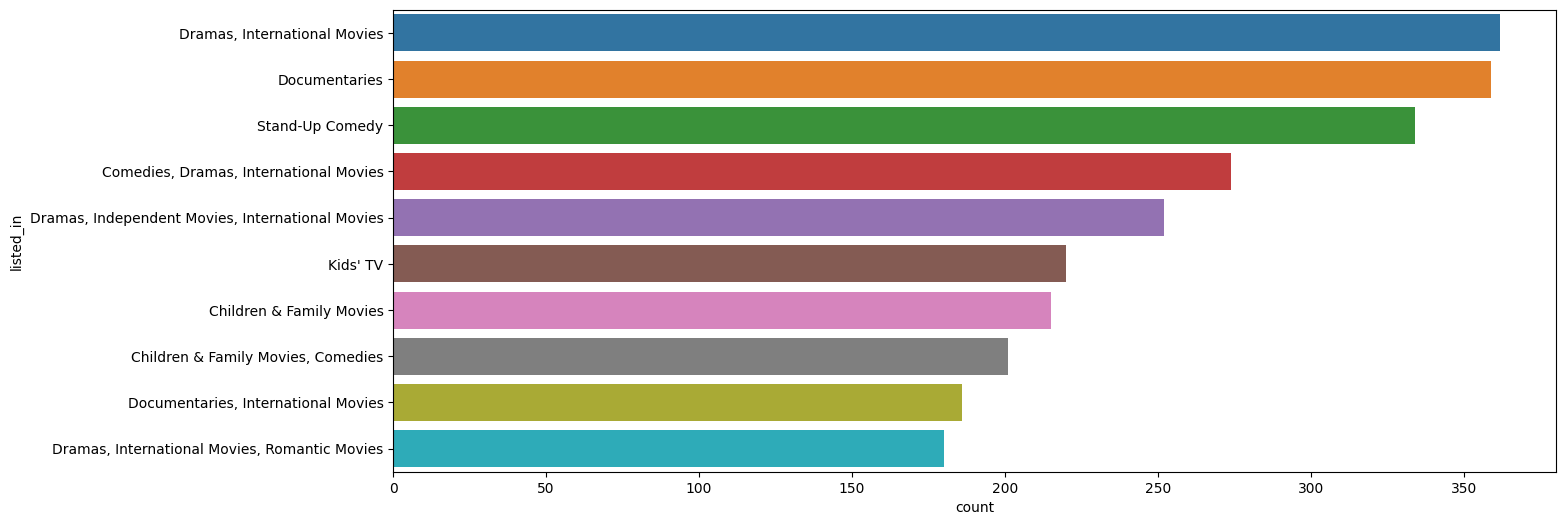

In [36]:
plt.figure(figsize=(15, 6))
sns.barplot(y=a.index,x=a)

In [37]:
netflix['category'] = netflix.listed_in.apply(lambda x : x.split(",")[0])

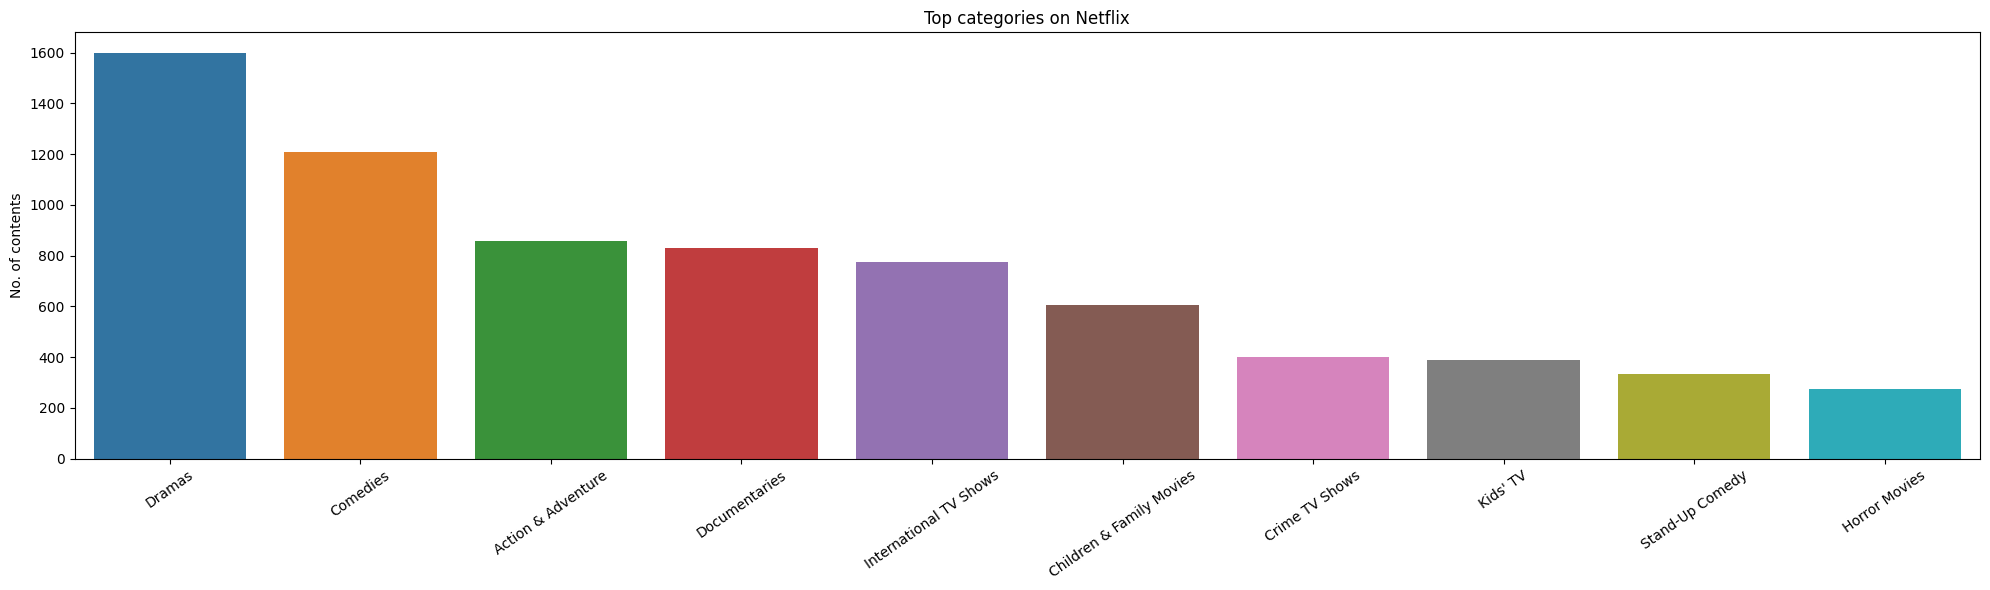

In [38]:
plt.figure(figsize=(20, 6))
# loc, labels = plt.xticks()
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_context("notebook")
p = sns.countplot(x = "category", data=netflix, order = netflix['category'].value_counts().nlargest(10).index)
p.set_xlabel("")
p.set_ylabel("No. of contents")
plt.xticks(rotation=35)
plt.title("Top categories on Netflix")
plt.tight_layout()
plt.show()

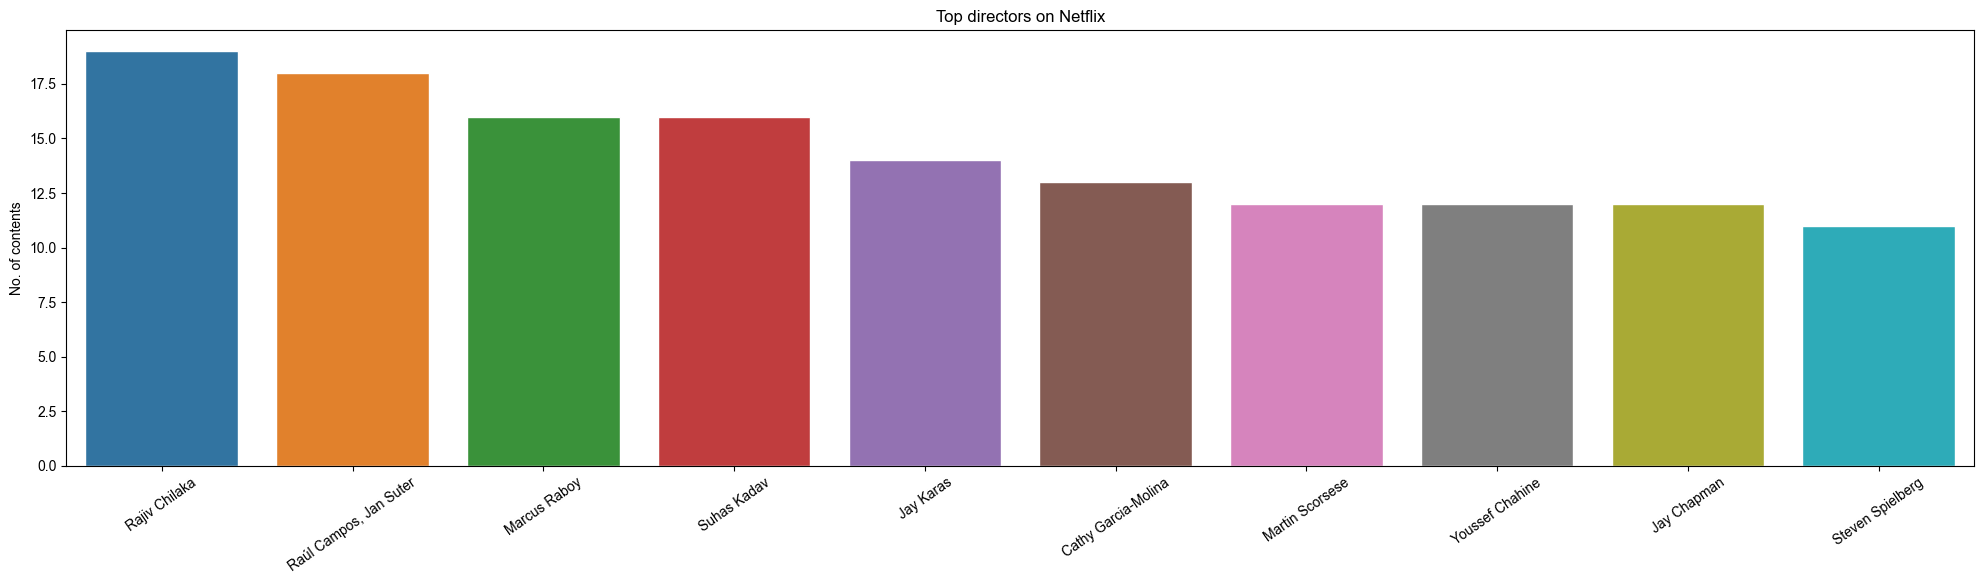

In [39]:
plt.figure(figsize=(20, 6))
loc, labels = plt.xticks()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook")
p = sns.countplot(x = "director", data=netflix, order = netflix['director'].value_counts().nlargest(10).index)
p.set_xlabel("")
p.set_ylabel("No. of contents")
plt.xticks(rotation=35)
plt.title("Top directors on Netflix")
plt.tight_layout()
plt.show()

In [40]:
netflix.drop('description',axis=1,inplace=True)

In [41]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,category
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows


In [42]:
c=netflix['country'].value_counts().nlargest(10)
c

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [43]:
fig=px.bar(x=c.index, y=c, title = 'Country-wise Max releases over the years', color_discrete_sequence=['green']) 
fig.show()

In [44]:
l=netflix['rating'].value_counts().nlargest(10)
l

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

In [45]:
fig=px.bar(x=l.index,y=l, title = 'Max type of ratings given', color_discrete_sequence=['gold'])
fig.show()

Most of the movies and Tv shows from dataset are rated TV-MA.

In [46]:
direc=netflix['director'].value_counts().nlargest(10)
direc

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [47]:
fig=px.bar(x=direc.index, y=direc, title = 'Top 10 directors who have maximum movies on Netflix', color_discrete_sequence=['purple'])
fig.show()

In [48]:
fig=px.pie(netflix,names='type',title='Type')
fig.show()

In [49]:
n=netflix.groupby('country')['type'].value_counts().nlargest(10)
n1=n.index.map(lambda x:x[0])
n2=n.index.map(lambda x:x[1])
n

country         type   
United States   Movie      2058
India           Movie       893
United States   TV Show     760
United Kingdom  TV Show     213
                Movie       206
Japan           TV Show     169
South Korea     TV Show     158
Canada          Movie       122
Spain           Movie        97
Egypt           Movie        92
Name: count, dtype: int64

In [50]:
fig=px.bar(x=n1, y=n, color=n2)
fig.show()

The above plot shows top 10 countries with maximum no. of movies and tv shows.

In [51]:
# fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
# movie_past_years = ott[(netflix.type == 'TV Show') & (netflix.release_year.between(2000,2022))]
# movie_past_years['seasons'] = movie_past_years.duration.apply(lambda x: [int(x) for x in x.split() if x.isdigit()][0])
# movie_past_years.groupby('release_year').seasons.mean().plot(
#     kind="line", 
#     marker="o",
#     ax = axes[0], 
#     subplots=True,
#     xlabel="",
#     ylabel="Mean duration (season)",
#     xticks=np.arange(2000,2022,1),
#     rot=35,
#     title="Mean duration of TV Shows compared to no. of uploaded TV Shows in the same years"
# )

# movie_past_years.groupby('release_year').size().plot(
#     kind='bar', 
#     ylabel="N° of contents",
#     xlabel="",
#     ax = axes[1], 
#     subplots=True,
#     rot=35,
# )

# plt.title("")
# fig.tight_layout()
# fig.show()

### EDA on Movies (1912-2022) on several OTT platforms

Reading the dataset

In [52]:
ott=pd.read_csv('df_stream_kaggle.csv')

##### Cleaning the OTT dataset

In [53]:
ott.head()

,Unnamed: 0,id,title,type,description,release_year,runtime,genres,production_countries,seasons,...,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,name,budget,nconst,primaryName,subscription_cost
0,0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,"['western', 'action', 'romance']",US,0.0,...,1213.0,4.079,4.700000,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,nm0102908,Robert N. Bradbury,14.99 CAD / month
1,1,tm1000022,Boonie Bears: The Wild Life,MOVIE,Bear brothers Briar and Bramble set off on an ...,2021,99,"['scifi', 'animation']",CN,0.0,...,117.0,6.135,3.800000,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",NaN,nm5694753,Leon Ding,14.99 CAD / month
2,2,tm1000169,Bad Cupid,MOVIE,Archie is a God on a mission to ensure that tr...,2021,81,"['romance', 'comedy']",US,0.0,...,181.0,3.295,4.800000,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",NaN,nm1526422,Diane Cossa,14.99 CAD / month
3,3,tm1000186,Carol's Christmas,MOVIE,Scrooge encounters the ghost of her late busin...,2021,70,"['drama', 'thriller']",US,0.0,...,48.0,0.600,5.989918,amazon,drama,[nan],NaN,nm5211977,David S Womack,14.99 CAD / month
4,4,tm1000203,Digging to Death,MOVIE,David Van Owen moves into a mysterious house a...,2021,96,"['horror', 'thriller']",US,0.0,...,464.0,3.543,5.800000,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",NaN,nm3810788,Michael P. Blevins,14.99 CAD / month


In [54]:
ott.shape

(18719, 22)

Printing the brief information about all the attributes

In [55]:
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18719 entries, 0 to 18718
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18719 non-null  int64  
 1   id                    18719 non-null  object 
 2   title                 18719 non-null  object 
 3   type                  18719 non-null  object 
 4   description           18719 non-null  object 
 5   release_year          18719 non-null  int64  
 6   runtime               18719 non-null  int64  
 7   genres                18719 non-null  object 
 8   production_countries  18719 non-null  object 
 9   seasons               18719 non-null  float64
 10  imdb_id               18719 non-null  object 
 11  imdb_score            18719 non-null  float64
 12  imdb_votes            18719 non-null  float64
 13  tmdb_popularity       18719 non-null  float64
 14  tmdb_score            18719 non-null  float64
 15  streaming_service  

Null values in each column

In [56]:
ott.isna().sum()

Unnamed: 0                  0
id                          0
title                       0
type                        0
description                 0
release_year                0
runtime                     0
genres                      0
production_countries        0
seasons                     0
imdb_id                     0
imdb_score                  0
imdb_votes                  0
tmdb_popularity             0
tmdb_score                  0
streaming_service           0
main_genre                  0
name                        0
budget                  12384
nconst                   1235
primaryName              1235
subscription_cost           0
dtype: int64

In [57]:
ott['type'].unique()

array(['MOVIE'], dtype=object)

In [58]:
ott['seasons'].unique()

array([0.])

In [59]:
ott['subscription_cost'].unique()


array(['14.99 CAD / month', '5.99 CAD / month', '6.99 CAD / month',
       '7.99 CAD / month', '9.99 CAD / month', '4.99 CAD / month'],
      dtype=object)

In [60]:
ott.loc[ott['nconst'].isna()].head(3)

,Unnamed: 0,id,title,type,description,release_year,runtime,genres,production_countries,seasons,...,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,name,budget,nconst,primaryName,subscription_cost
62,62,tm10129,Azhagan,MOVIE,"Azhagappan, a handsome widower with four child...",1991,155,"['romance', 'family', 'drama']",IN,0.0,...,208.0,1.862,6.000000,amazon,romance,"['Mammootty', 'Bhanupriya', 'Madhoo', 'Geetha'...",NaN,NaN,NaN,14.99 CAD / month
77,77,tm101627,The Return Of Chandu,MOVIE,"The cult of Ubasti, headquartered on the isle ...",1934,60,"['fantasy', 'family', 'horror']",US,0.0,...,359.0,0.600,5.781143,amazon,fantasy,"['Bela Lugosi', 'Maria Alba', 'Lucien Prival',...",NaN,NaN,NaN,14.99 CAD / month
122,122,tm1022912,One,MOVIE,"Story of Kadakkal Chandran, the Chief Minister...",2021,151,"['drama', 'thriller']",IN,0.0,...,2672.0,2.124,6.600000,amazon,drama,"['Mammootty', 'Joju George', 'Murali Gopy', 'M...",NaN,NaN,NaN,14.99 CAD / month


Dropping unnecessary columns

In [61]:
ott.drop (ott.columns [ott.columns.str.contains ('unnamed',case = False)],axis = 1, inplace = True)

In [62]:
ott.drop('description',axis=1,inplace=True)
ott.drop('id',axis=1,inplace=True)
ott.drop('type',axis=1,inplace=True)
ott.drop('seasons',axis=1,inplace=True)
ott.drop('nconst',axis=1,inplace=True)
ott.drop('imdb_id',axis=1,inplace=True)

In [63]:
ott

,title,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,name,budget,primaryName,subscription_cost
0,The Lucky Texan,1934,61,"['western', 'action', 'romance']",US,5.6,1213.0,4.079,4.700000,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,Robert N. Bradbury,14.99 CAD / month
1,Boonie Bears: The Wild Life,2021,99,"['scifi', 'animation']",CN,5.4,117.0,6.135,3.800000,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",NaN,Leon Ding,14.99 CAD / month
2,Bad Cupid,2021,81,"['romance', 'comedy']",US,4.4,181.0,3.295,4.800000,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",NaN,Diane Cossa,14.99 CAD / month
3,Carol's Christmas,2021,70,"['drama', 'thriller']",US,2.0,48.0,0.600,5.989918,amazon,drama,[nan],NaN,David S Womack,14.99 CAD / month
4,Digging to Death,2021,96,"['horror', 'thriller']",US,4.5,464.0,3.543,5.800000,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",NaN,Michael P. Blevins,14.99 CAD / month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,The Quiz Show Scandal,2010,121,['comedy'],KR,6.1,162.0,2.700,5.400000,rakuten,comedy,"['Han Jae-suk', 'Kim Su-ro', 'Ryu Seung-ryong'...",NaN,Jin Jang,4.99 CAD / month
18715,Motelier,2020,97,"['romance', 'comedy', 'drama']",KR,2.3,9.0,0.799,6.000000,rakuten,romance,"['Lee Ga-eun', 'Lee Ki-yong', 'Ahn Jong-sun', ...",NaN,Jeong Hoon Lee,4.99 CAD / month
18716,Wish You,2021,101,"['drama', 'music', 'romance']",KR,6.4,804.0,7.246,8.100000,rakuten,drama,"['Kang In-soo', 'Lee Sang', 'Park Soo-bin', 'B...",NaN,Do Joon Sung,4.99 CAD / month
18717,Double Patty,2021,107,['drama'],KR,5.6,228.0,2.800,6.000000,rakuten,drama,"['Irene', 'Shin Seung-ho', 'Jung Young-ju', 'J...",NaN,Seung-Hwan Paek,4.99 CAD / month


In [64]:
ott['release_year'].min()

1912

In [65]:
ott['release_year'].max()

2022

In [66]:
ott.head(1)

,title,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,name,budget,primaryName,subscription_cost
0,The Lucky Texan,1934,61,"['western', 'action', 'romance']",US,5.6,1213.0,4.079,4.7,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,Robert N. Bradbury,14.99 CAD / month


Renaming columns

In [67]:
ott.rename(columns={'name': 'cast', 'primaryName': 'director', 'production_countries': 'countries'}, inplace=True)
print(ott.columns)

Index(['title', 'release_year', 'runtime', 'genres', 'countries', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'streaming_service',
       'main_genre', 'cast', 'budget', 'director', 'subscription_cost'],
      dtype='object')


In [68]:
ott.head(1)

,title,release_year,runtime,genres,countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,cast,budget,director,subscription_cost
0,The Lucky Texan,1934,61,"['western', 'action', 'romance']",US,5.6,1213.0,4.079,4.7,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,Robert N. Bradbury,14.99 CAD / month


Release Years and the Runtime of Movies

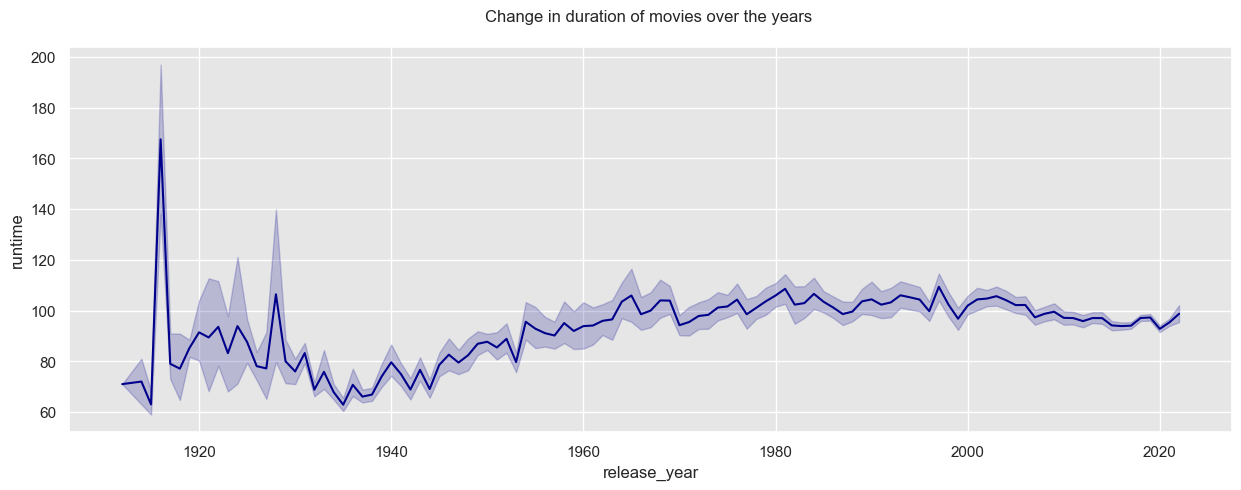

In [69]:
plt.figure(figsize=(15, 5))
sns.lineplot(y=ott['runtime'], x=ott['release_year'], color='darkblue').set(title="Change in duration of movies over the years \n")
plt.show()

In [70]:
# fig=px.bar(x=ott['release_year'], y=ott['runtime'], title = 'Total count of each subscription plan', color_discrete_sequence=['green'])
# fig.show()

Genres available across all the OTT platforms

In [71]:
ott['genres'].unique()

array(["['western', 'action', 'romance']", "['scifi', 'animation']",
       "['romance', 'comedy']", ...,
       "['drama', 'fantasy', 'action', 'crime']",
       "['documentation', 'music', 'romance', 'action', 'european']",
       "['action', 'comedy', 'history', 'war']"], dtype=object)

In [72]:
ott['genres'].nunique()

3395

In [73]:
a1=ott['genres'].value_counts().nlargest(10)
a1

genres
['drama']                      1320
['comedy']                     1133
['documentation']              1112
['horror']                      357
['drama', 'romance']            336
['comedy', 'drama']             301
['drama', 'comedy']             289
['comedy', 'documentation']     252
['comedy', 'romance']           250
['romance', 'comedy']           218
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='genres'>

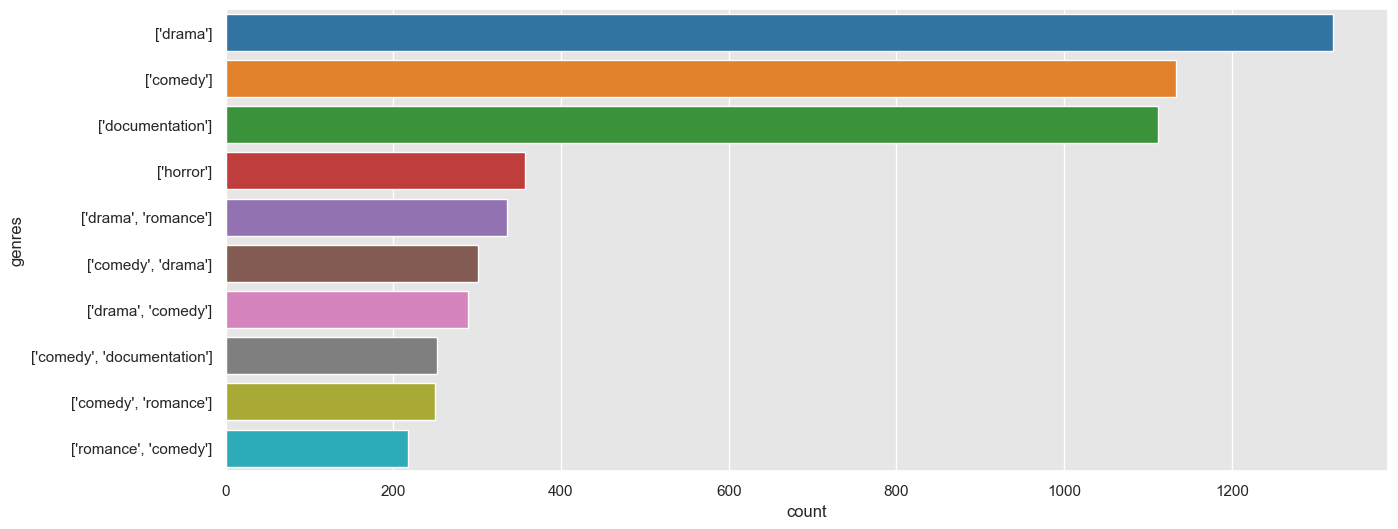

In [74]:
plt.figure(figsize=(15, 6))
sns.barplot(y=a1.index, x=a1)

Main genres (individual) available across all the OTT platforms

In [75]:
s2 = ott['main_genre'].unique()
s2

array(['western', 'scifi', 'romance', 'drama', 'horror', 'thriller',
       'comedy', 'crime', 'documentation', 'family', 'action', 'fantasy',
       'animation', 'music', 'history', 'war', 'european', 'sport',
       'reality'], dtype=object)

In [76]:
s1 = ott['main_genre'].value_counts().nlargest(10)
s1

main_genre
drama            4592
comedy           3412
thriller         2225
documentation    1812
horror           1227
romance          1079
action            929
fantasy           672
western           662
scifi             623
Name: count, dtype: int64

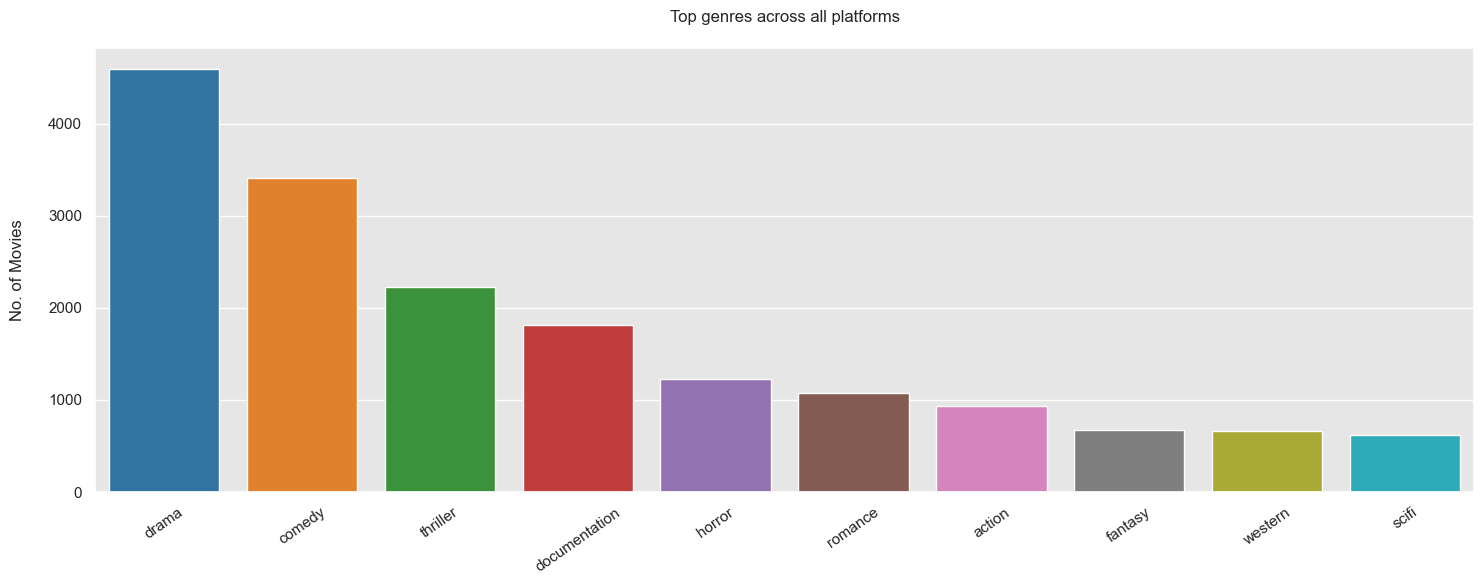

In [77]:
plt.figure(figsize=(15, 6))
# sns.barplot(y=a1.index, x=a1)

p1 = sns.countplot(x = "main_genre", data=ott, order = ott['main_genre'].value_counts().nlargest(10).index)
p1.set_xlabel("")
p1.set_ylabel("No. of Movies\n")
plt.xticks(rotation=35)
plt.title("Top genres across all platforms\n")
plt.tight_layout()
plt.show()

In [78]:
z = ott[ott['main_genre'].isin(['drama', 'comedy','documentation', 'thriller','action','horror','romance','scifi'])]

In [79]:
ott["imdb_x_popularity"] = ott["imdb_score"] * (1 + ott["tmdb_popularity"])

In [80]:
# fig_6, axes_6 = plt.subplots(3, 3, figsize=(20, 10))
 
# fig_6.suptitle("Which genre is garnering viewer's attention")


# plt.subplots_adjust(hspace=0.3, wspace=0.3)
 
# palette_6 = sns.color_palette("bright", 8)

# palette_kde = {"action":"#215BCD","comedy": "#F0AB16", "documentation":"#C7C7C7", "drama": "#E2E80D", "horror" : "#B00505", 
#                     "romance": "#E886F0", "scifi" :"#A3F5FF", "thriller":"#69D238"}

# genre_order = ott["main_genre"].unique()

# g11 = sns.kdeplot(ax=axes_6[0, 0], data=ott, x='imdb_x_popularity', hue = "main_genre", palette = palette_kde,hue_order=genre_order)
# g11.set_title('All Streaming Service')
# g11.set(xlabel="IMDb Rating x TMDB Popularity")    



# g12 = sns.kdeplot(ax=axes_6[0, 1], data=ott[ott["streaming_service"] == 'amazon'], x='imdb_x_popularity', hue = "main_genre", palette = palette_kde,hue_order=genre_order, legend = False)
# g12.set_title('Amazon Prime', loc = 'right',fontsize = 13)
# g12.set(xlabel="IMDb Rating x TMDB Popularity")

# g13 = sns.kdeplot(ax=axes_6[0, 2], data=ott[ott["streaming_service"] == 'disney'], x='imdb_x_popularity', hue = "main_genre", palette = palette_kde,hue_order=genre_order, legend = False)
# g13.set_title('Disney+', loc = 'right',fontsize = 13)
# g13.set(xlabel="IMDb Rating x TMDB Popularity")


# g14 = sns.kdeplot(ax=axes_6[1, 0], data=ott[ott["streaming_service"] == 'hulu'], x='imdb_x_popularity', hue = "main_genre", palette = palette_kde,hue_order=genre_order, legend = False)
# g14.set_title('Hulu', loc = 'right',fontsize = 13)
# g14.set(xlabel="IMDb Rating x TMDB Popularity")

# g15 = sns.kdeplot(ax=axes_6[1, 1], data=ott[ott["streaming_service"] == 'hbo'], x='imdb_x_popularity', hue = "main_genre", palette = palette_kde,hue_order=genre_order, legend = False)
# g15.set_title('HBO', loc = 'right',fontsize = 13)
# g15.set(xlabel="IMDb Rating x TMDB Popularity")

# g16 = sns.kdeplot(ax=axes_6[1, 2], data=ott[ott["streaming_service"] == 'darkmatter'], x='imdb_x_popularity', hue = "main_genre", palette = palette_kde,hue_order=genre_order, legend = False)
# g16.set_title('Darkmatter', loc = 'right',fontsize = 13)
# g16.set(xlabel="IMDb Rating x TMDB Popularity")


# g17 = sns.kdeplot(ax=axes_6[2, 0], data=ott[ott["streaming_service"] == 'paramount'], x='imdb_x_popularity', hue = "main_genre", palette = palette_kde,hue_order=genre_order, legend = False)
# g17.set_title('Paramount Streaming', loc = 'right',fontsize = 13)
# g17.set(xlabel="IMDb Rating x TMDB Popularity")

# g18 = sns.kdeplot(ax=axes_6[2, 1], data=ott[ott["streaming_service"] == 'netflix'], x='imdb_x_popularity', hue = "main_genre", palette = palette_kde,hue_order=genre_order, legend = False)
# g18.set_title('Netflix', loc = 'right',fontsize = 13)
# g18.set(xlabel="IMDb Rating x TMDB Popularity")

Streaming Services covered in the dataset

In [81]:
o = ott['streaming_service'].unique()
o

array(['amazon', 'netflix', 'disney', 'crunchyroll', 'hulu', 'hbo',
       'darkmatter', 'paramount', 'rakuten'], dtype=object)

In [82]:
print("Total no. of platforms available: ", ott['streaming_service'].nunique())

Total no. of platforms available:  9


In [83]:
s=ott['streaming_service'].value_counts()
s

streaming_service
amazon         7875
netflix        3477
hbo            2264
paramount      2062
hulu            987
darkmatter      940
disney          758
rakuten         355
crunchyroll       1
Name: count, dtype: int64

In [84]:
fig=px.bar(x=s.index, y=s, title = 'Total no. of movies available on each OTT platform')
fig.show()

In [85]:
# # r1 = px.data.gapminder().query("country == 'Canada'")
# fig = px.data.gapminder(x=s.index, y=s.values)
# fig.show()

In [86]:
ott.head(1)

,title,release_year,runtime,genres,countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,cast,budget,director,subscription_cost,imdb_x_popularity
0,The Lucky Texan,1934,61,"['western', 'action', 'romance']",US,5.6,1213.0,4.079,4.7,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,Robert N. Bradbury,14.99 CAD / month,28.4424


In [87]:
ott

,title,release_year,runtime,genres,countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,cast,budget,director,subscription_cost,imdb_x_popularity
0,The Lucky Texan,1934,61,"['western', 'action', 'romance']",US,5.6,1213.0,4.079,4.700000,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,Robert N. Bradbury,14.99 CAD / month,28.4424
1,Boonie Bears: The Wild Life,2021,99,"['scifi', 'animation']",CN,5.4,117.0,6.135,3.800000,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",NaN,Leon Ding,14.99 CAD / month,38.5290
2,Bad Cupid,2021,81,"['romance', 'comedy']",US,4.4,181.0,3.295,4.800000,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",NaN,Diane Cossa,14.99 CAD / month,18.8980
3,Carol's Christmas,2021,70,"['drama', 'thriller']",US,2.0,48.0,0.600,5.989918,amazon,drama,[nan],NaN,David S Womack,14.99 CAD / month,3.2000
4,Digging to Death,2021,96,"['horror', 'thriller']",US,4.5,464.0,3.543,5.800000,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",NaN,Michael P. Blevins,14.99 CAD / month,20.4435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,The Quiz Show Scandal,2010,121,['comedy'],KR,6.1,162.0,2.700,5.400000,rakuten,comedy,"['Han Jae-suk', 'Kim Su-ro', 'Ryu Seung-ryong'...",NaN,Jin Jang,4.99 CAD / month,22.5700
18715,Motelier,2020,97,"['romance', 'comedy', 'drama']",KR,2.3,9.0,0.799,6.000000,rakuten,romance,"['Lee Ga-eun', 'Lee Ki-yong', 'Ahn Jong-sun', ...",NaN,Jeong Hoon Lee,4.99 CAD / month,4.1377
18716,Wish You,2021,101,"['drama', 'music', 'romance']",KR,6.4,804.0,7.246,8.100000,rakuten,drama,"['Kang In-soo', 'Lee Sang', 'Park Soo-bin', 'B...",NaN,Do Joon Sung,4.99 CAD / month,52.7744
18717,Double Patty,2021,107,['drama'],KR,5.6,228.0,2.800,6.000000,rakuten,drama,"['Irene', 'Shin Seung-ho', 'Jung Young-ju', 'J...",NaN,Seung-Hwan Paek,4.99 CAD / month,21.2800


Top 10 directors with maximum movies across all OTT platforms

In [88]:
d1 = ott['director'].unique
d1

<bound method Series.unique of 0        Robert N. Bradbury
1                 Leon Ding
2               Diane Cossa
3            David S Womack
4        Michael P. Blevins
                ...        
18714              Jin Jang
18715        Jeong Hoon Lee
18716          Do Joon Sung
18717       Seung-Hwan Paek
18718        Dong-hoon Baek
Name: director, Length: 18719, dtype: object>

In [89]:
d2 = ott['director'].value_counts().head(10)
d2

director
Joseph Kane           66
Sam Newfield          55
Jay Chapman           45
Ryan Polito           40
Harry L. Fraser       33
Lesley Selander       32
Robert N. Bradbury    31
Marcus Raboy          31
William Beaudine      30
William Nigh          28
Name: count, dtype: int64

In [90]:
fig=px.bar(x=d2.index,y=d2, title = 'Directors with with max movies on OTT ', color_discrete_sequence=['gray'])
fig.show()

In [91]:
# ot3 = ott['streaming_service'].unique['amazon']
# ot3

No. of movies of Jospeh Kane available across all OTT platforms

In [92]:
# plt.figure(figsize=(15, 6))
# sns.barplot(y=ott.director.values()['Joseph Kane'==True], x=ott.streaming_service, color='red').set(title="Cost of each OTT subscription")
# plt.show()

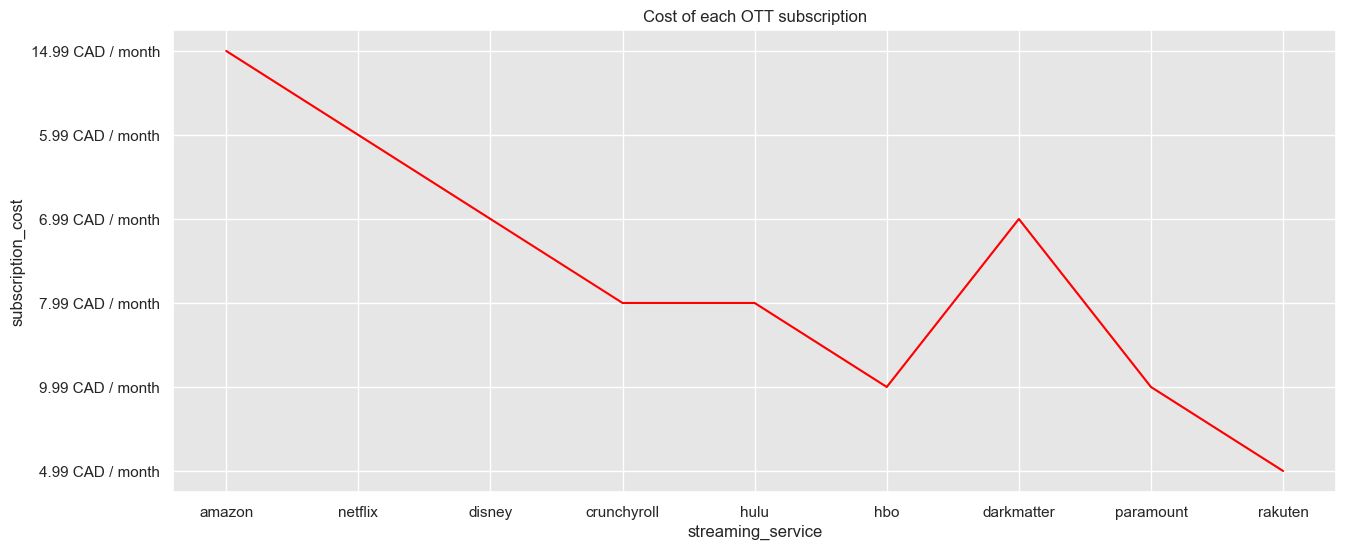

In [93]:
plt.figure(figsize=(15, 6))
# df = sns.load_dataset("ott")
sns.lineplot(y=ott.subscription_cost, x=ott.streaming_service, color='red').set(title="Cost of each OTT subscription")
plt.show() 

In [94]:
ott['subscription_cost'].unique()

array(['14.99 CAD / month', '5.99 CAD / month', '6.99 CAD / month',
       '7.99 CAD / month', '9.99 CAD / month', '4.99 CAD / month'],
      dtype=object)

In [95]:
b1=ott['subscription_cost'].value_counts()
b1

subscription_cost
14.99 CAD / month    7875
9.99 CAD / month     4326
5.99 CAD / month     3477
6.99 CAD / month     1698
7.99 CAD / month      988
4.99 CAD / month      355
Name: count, dtype: int64

In [96]:
fig=px.bar(x=s.index, y=s, title = 'Total count of each subscription plan', color_discrete_sequence=['green'])
fig.show()

In [97]:
plt.figure(figsize=(6, 6))
fig=px.pie(ott, names='subscription_cost',title='Total count of each subscription plan')
fig.show()

<Figure size 600x600 with 0 Axes>

In [98]:
w = ott['countries'].unique()
w

array(['US', 'CN', 'IN', ..., 'HK,JP,CN', 'KR,TH', 'IT,CN'], dtype=object)

In [99]:
w1 = ott['countries'].value_counts().head(10)
w1

countries
US       10731
IN        1486
GB         782
CA         444
JP         297
KR         258
FR         200
GB,US      192
XX         173
AU         169
Name: count, dtype: int64

In [100]:
fig=px.bar(x=w1.index,y=w1, title = 'Countries having max movies on OTT', color_discrete_sequence=['purple'])
fig.show()

Top 10 countries having max movies on Netflix

In [101]:
# fig=px.bar(x=w1.index,y=w1, title = 'Countries having max movies on OTT', color_discrete_sequence=['purple'])
# fig.show()

In [102]:
w2 = ott['countries'].value_counts()['US']
w2

10731

No. of year-wise releases in US

In [103]:
# fig=px.line(y=w2, x=ott['release_year'].index, title = 'Max type of ratings given', color_discrete_sequence=['gold'])
# fig.show()

In [104]:
# ott.['budget'].max(value_counts())


In [105]:
q = ott['budget'].nlargest(10)
q

11628    380000000.0
12016    300000000.0
11536    280000000.0
14265    270000000.0
11356    260000000.0
11961    260000000.0
17074    260000000.0
9784     250000000.0
11479    250000000.0
11585    250000000.0
Name: budget, dtype: float64

In [106]:
# fig=px.line(x=q, y=w, title = 'Total count of each subscription plan', color_discrete_sequence=['green'])
# fig.show()

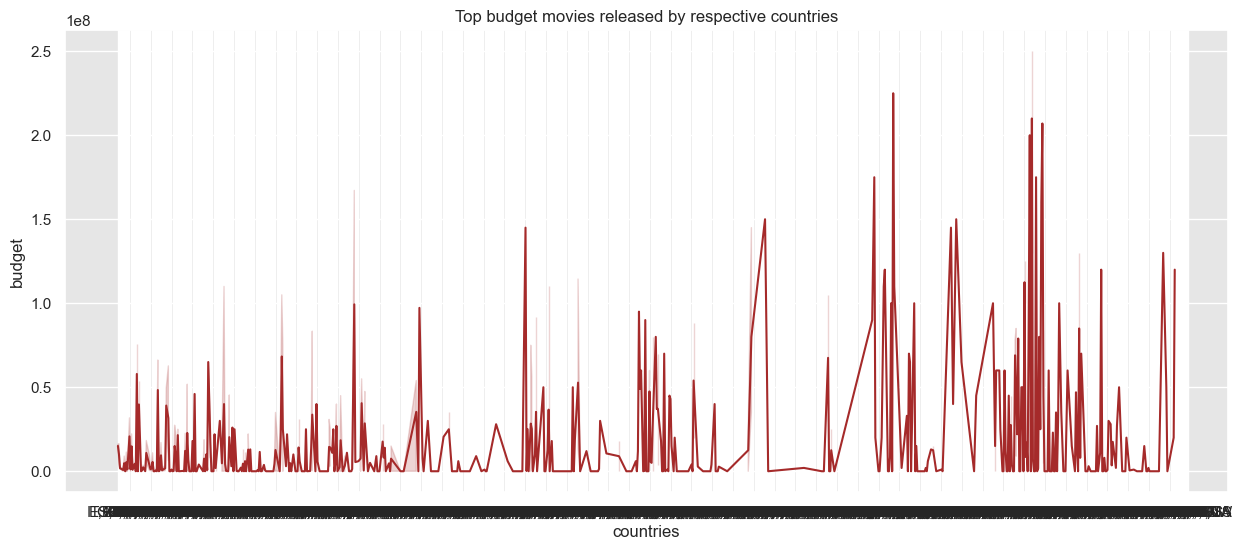

In [107]:
plt.figure(figsize=(15, 6))
# df = sns.load_dataset("ott")
sns.lineplot(y=ott.budget, x=ott.countries, color='brown').set(title="Top budget movies released by respective countries")
plt.show() 

In [108]:
t = ott.nlargest(50, 'budget')
t

,title,release_year,runtime,genres,countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,cast,budget,director,subscription_cost,imdb_x_popularity
11628,Pirates of the Caribbean: On Stranger Tides,2011,137,"['fantasy', 'action']","GB,US",6.6,513684.0,556.515,6.500,disney,fantasy,"['Johnny Depp', 'Penélope Cruz', 'Geoffrey Rus...",380000000.0,Rob Marshall,6.99 CAD / month,3679.5990
12016,Pirates of the Caribbean: At World's End,2007,169,"['fantasy', 'action']",US,7.1,633813.0,570.745,7.200,disney,fantasy,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",300000000.0,Gore Verbinski,6.99 CAD / month,4059.3895
11536,Avengers: Age of Ultron,2015,141,"['scifi', 'action', 'comedy']",US,7.3,832073.0,222.087,7.300,disney,scifi,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",280000000.0,Joss Whedon,6.99 CAD / month,1628.5351
14265,Superman Returns,2006,154,"['scifi', 'action']",US,6.1,281120.0,27.728,5.700,hbo,scifi,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...",270000000.0,Bryan Singer,9.99 CAD / month,175.2408
11356,Tangled,2010,100,"['animation', 'romance', 'comedy', 'family', '...",US,7.7,440155.0,100.872,7.600,disney,animation,"['Mandy Moore', 'Zachary Levi', 'Donna Murphy'...",260000000.0,Nathan Greno,6.99 CAD / month,784.4144
11961,John Carter,2012,132,"['scifi', 'action', 'european']",US,6.6,269059.0,99.635,6.200,disney,scifi,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",260000000.0,Andrew Stanton,6.99 CAD / month,664.1910
17074,Transformers: The Last Knight,2017,149,"['action', 'scifi']","CA,US",5.2,148249.0,77.890,6.100,paramount,action,"['Mark Wahlberg', 'Josh Duhamel', 'Stanley Tuc...",260000000.0,Michael Bay,9.99 CAD / month,410.2280
9784,The Dark Knight Rises,2012,165,"['thriller', 'action', 'drama', 'crime']",US,8.4,1669067.0,91.760,7.768,netflix,thriller,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",250000000.0,Christopher Nolan,5.99 CAD / month,779.1840
11479,Captain America: Civil War,2016,148,"['action', 'scifi']",US,7.8,753227.0,169.294,7.400,disney,action,"['Chris Evans', 'Robert Downey Jr.', 'Scarlett...",250000000.0,Joe Russo,6.99 CAD / month,1328.2932
11585,X-Men: Days of Future Past,2014,131,"['fantasy', 'scifi', 'action', 'thriller']",US,8.0,697960.0,91.650,7.500,disney,fantasy,"['Hugh Jackman', 'James McAvoy', 'Michael Fass...",250000000.0,Bryan Singer,6.99 CAD / month,741.2000


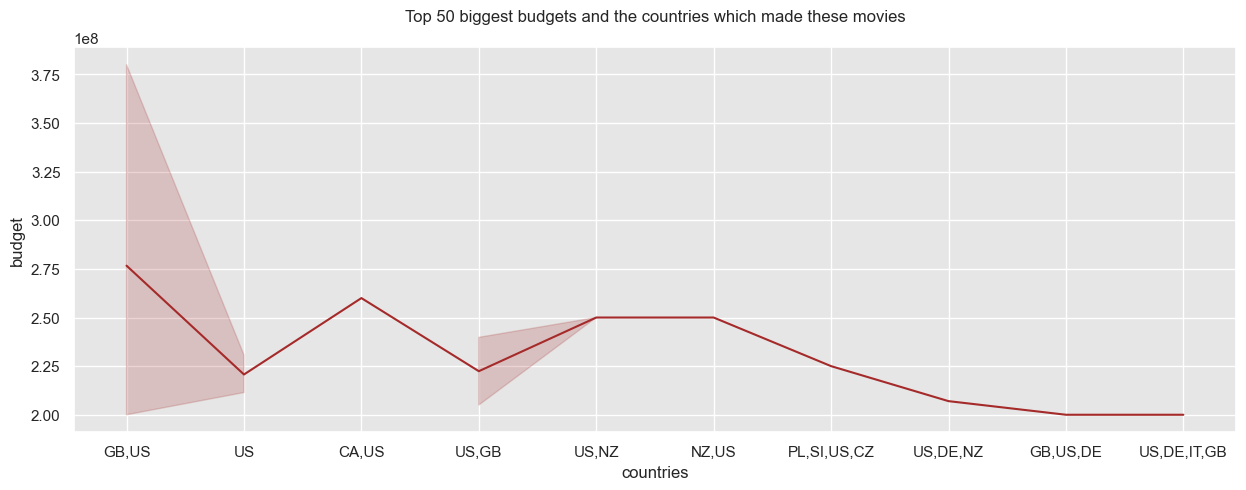

In [109]:
plt.figure(figsize=(15, 5))
sns.lineplot(y=t['budget'], x=t['countries'], color='brown').set(title="Top 50 biggest budgets and the countries which made these movies\n")
plt.show()

In [110]:
ott.shape

(18719, 16)

In [111]:
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18719 entries, 0 to 18718
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              18719 non-null  object 
 1   release_year       18719 non-null  int64  
 2   runtime            18719 non-null  int64  
 3   genres             18719 non-null  object 
 4   countries          18719 non-null  object 
 5   imdb_score         18719 non-null  float64
 6   imdb_votes         18719 non-null  float64
 7   tmdb_popularity    18719 non-null  float64
 8   tmdb_score         18719 non-null  float64
 9   streaming_service  18719 non-null  object 
 10  main_genre         18719 non-null  object 
 11  cast               18719 non-null  object 
 12  budget             6335 non-null   float64
 13  director           17484 non-null  object 
 14  subscription_cost  18719 non-null  object 
 15  imdb_x_popularity  18719 non-null  float64
dtypes: float64(6), int64(2

In [112]:
ott.isna().sum()

title                    0
release_year             0
runtime                  0
genres                   0
countries                0
imdb_score               0
imdb_votes               0
tmdb_popularity          0
tmdb_score               0
streaming_service        0
main_genre               0
cast                     0
budget               12384
director              1235
subscription_cost        0
imdb_x_popularity        0
dtype: int64

Top 10 highest budgeted movies

In [113]:
plt.figure(figsize = (30,10))
df_top_budg =  ott.sort_values(by = 'budget',ascending = False).head(10).copy()

fig=px.bar(x=df_top_budg['title'], y=df_top_budg['budget'], color_discrete_sequence=['brown'])

fig.update_layout(title='Top Budget Movies across all OTT Platforms', xaxis_title='X Axis', yaxis_title='Y Axis')
fig.show()

<Figure size 3000x1000 with 0 Axes>

In [114]:
max_budget = ott.groupby(['streaming_service'])['budget'].max()
idx = ott.groupby(['streaming_service'])['budget'].idxmax()

result = pd.DataFrame({'streaming_service': max_budget.index, 'max_budget': max_budget.values, 'movie_name': ott.loc[idx]['title'].values})

fig=px.bar(x=result['streaming_service'], y=result['max_budget'], color_discrete_sequence=['orange'])

fig.update_layout(title='Top Budget Movies in Each Platform', xaxis_title='X Axis', yaxis_title='Y Axis')

Scores and Ratings

In [115]:
ott.head(1)

,title,release_year,runtime,genres,countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,cast,budget,director,subscription_cost,imdb_x_popularity
0,The Lucky Texan,1934,61,"['western', 'action', 'romance']",US,5.6,1213.0,4.079,4.7,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,Robert N. Bradbury,14.99 CAD / month,28.4424


In [116]:
ott['imdb_score'].min()

0.5

In [117]:
ott['imdb_score'].max()

10.0

In [118]:
10/2

5.0

In [119]:
ott['imdb_score'].value_counts()

imdb_score
6.300000    636
6.200000    630
6.400000    621
6.500000    599
6.600000    579
           ... 
6.022727      1
1.200000      1
6.706000      1
6.639474      1
5.832258      1
Name: count, Length: 123, dtype: int64

In [120]:
import plotly.graph_objects as go
import plotly.io as pio

pio.templates["plotly_dark_custom"] = go.layout.Template(
    # ...custom definitions here...
)
pio.templates.default = "plotly_dark_custom"

In [121]:
avg = np.average(ott['imdb_score'])
avg

6.011719922362552

In [122]:
Aavg = ott['imdb_score'] > avg
Aavg

0        False
1        False
2        False
3        False
4        False
         ...  
18714     True
18715    False
18716     True
18717    False
18718     True
Name: imdb_score, Length: 18719, dtype: bool

Finding no. of movies that are above/below average

In [123]:
fig=px.pie(Aavg, names='imdb_score', title='Movies with Above/Below average IMDB Ratings', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


Thus, we can say that 52.6% MOvies are rated above average across all OTT platforms based on the IMDB ratings

In [124]:
ott['tmdb_score'].value_counts()


tmdb_score
6.000000    910
7.000000    655
6.500000    626
6.300000    604
5.000000    597
           ... 
6.135000      1
5.552000      1
8.409000      1
5.672000      1
7.059091      1
Name: count, Length: 360, dtype: int64

In [125]:
avg1 = np.average(ott['tmdb_score'])
avg1

6.083898174103973

In [126]:
Aavg1 = ott['tmdb_score'] > avg
Aavg1

0        False
1        False
2        False
3        False
4        False
         ...  
18714    False
18715    False
18716     True
18717    False
18718     True
Name: tmdb_score, Length: 18719, dtype: bool

In [127]:
fig=px.pie(Aavg1, names='tmdb_score', title='Movies with Above/Below average TMDB Ratings')
fig.show()

Comparison of Movies based on top IMDB as well as top TMDB popularity

In [128]:
plt.figure(figsize = (30,10))
df_imdb_pop =  ott.sort_values(by = 'imdb_x_popularity',ascending = False).head(10).copy()

fig=px.bar(x=df_imdb_pop['title'], y=df_imdb_pop['imdb_x_popularity'], color_discrete_sequence=['violet'])

fig.update_layout(title='Top Movies based on IMDB Popularity across all OTT Platforms', xaxis_title='X Axis', yaxis_title='Y Axis')
fig.show()

<Figure size 3000x1000 with 0 Axes>

In [129]:
plt.figure(figsize = (30,10))
df_tmdb_pop =  ott.sort_values(by = 'tmdb_popularity',ascending = False).head(10).copy()

fig=px.bar(x=df_tmdb_pop['title'], y=df_tmdb_pop['tmdb_popularity'], color_discrete_sequence=['cyan'])

fig.update_layout(title='Top Movies based on TMDB Popularity across all OTT Platforms', xaxis_title='X Axis', yaxis_title='Y Axis')
fig.show()

<Figure size 3000x1000 with 0 Axes>

Based on IMDB Popularity: -

###### (1) The Batman > (2) Doctor Strange > (3) Turning Red > (4) Incantation > (5) The Sea Beast > (6) Valley of the Dead > (7) All the Old Knives > (8) Encanto > (9) The Man from Toronto > (10) No Exit


Based on TMDB Popularity: -

###### (1) The Batman > (2) Doctor Strange > (3) Turning Red > (4) Incantation > (5) The Sea Beast > (6) Valley of the Dead > (7) The Man from Toronto > (8) All the Old Knives  > (9) No Exit > (10) Collision

In [130]:
# ott.groupby(['imdb_x_popularity'.head(),'tmdb_popularity'.head()]).size().unstack().plot(
#     kind='bar', 
#     stacked=False, 
#     figsize=(20, 6), 
#     ylabel="No. of contents",
#     xlabel="Release Year"
# )
# plt.title("Growth of no. of contents through years stratified by content type")
# plt.show()

In [131]:
ott.head(1)

,title,release_year,runtime,genres,countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,cast,budget,director,subscription_cost,imdb_x_popularity
0,The Lucky Texan,1934,61,"['western', 'action', 'romance']",US,5.6,1213.0,4.079,4.7,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,Robert N. Bradbury,14.99 CAD / month,28.4424


In [132]:
i1=ott['imdb_score'].value_counts().nlargest(10)
t1=ott['tmdb_score'].value_counts().nlargest(10)

In [133]:
# x = ['title']
 
# fig=px.bar[(x = x, y = i1.values ), ( x = x, y = t1.values)]
                  
# plot.show()